# Problem 2

As I discussed in class, I wanted to create a modeal about age distribution(continuous distribution) and getting cold probability(discrete distribution). However, I haven't found one function in pymc3 package that could calulate cdf of Normal distribution. Thus, in this part. I just made a model as below, relationship amony Normal distribution, Grammar distribution and Poisson distribution, but without a sample in real life.

![%E5%9B%BE%E7%89%871.png](attachment:%E5%9B%BE%E7%89%871.png)

This part is establish the relationship mention above:

In [2]:
import numpy, pymc3, theano
import math

nobserve = 1000
nsamples = 20000

# standard variance for priors
alphasd1 = 2
betasd1  = 3

alphasd2 = 4
betasd2  = 5
# create shared memory for changing observations
obsdata = theano.shared(numpy.zeros(nobserve))
# get a tiny number to avoid 0, even it is highly unlikely
eps = numpy.finfo(numpy.double).tiny

with pymc3.Model() as model:
    alpha1 = pymc3.Normal('alpha1',mu=alphasd1,sd=math.sqrt(alphasd1))
    beta1  = pymc3.Normal('beta1',mu=betasd1,sd=math.sqrt(betasd1))
    alpha2 = pymc3.Normal('alpha2',mu=alphasd2,sd=math.sqrt(alphasd2))
    beta2  = pymc3.Normal('beta2',mu=betasd2,sd=math.sqrt(betasd2))
    # varibles depends on other variables
    r1 = pymc3.Gamma('r1', alpha=alpha1+eps, beta=beta1+eps)
    r2 = pymc3.Gamma('r2', alpha=alpha2+eps, beta=beta2+eps)
    n = pymc3.Poisson('n', mu=(r1+r2), observed=obsdata)

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
D:\jupyter\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


Create random values for ground truth and print out:

In [3]:
# initialize ground truth with random values
gtruthA = numpy.random.normal(loc= alphasd1, scale = math.sqrt(alphasd1)) + eps
gtruthB = numpy.random.normal(loc= betasd1, scale = math.sqrt(betasd1)) + eps
gtruthC = numpy.random.normal(loc= alphasd2, scale = math.sqrt(alphasd2)) + eps
gtruthD = numpy.random.normal(loc= betasd2, scale = math.sqrt(betasd2)) + eps

gtruthR1 = numpy.random.gamma(gtruthA, 1 / gtruthB)
gtruthR2 = numpy.random.gamma(gtruthC, 1 / gtruthD)
# print ground truth in output
print('Ground Truth of Alpha1 : ', gtruthA)
print('Ground Truth of Beta1 : ', gtruthB)
print('Ground Truth of Alpha2  : ', gtruthC)
print('Ground Truth of Beta2  : ', gtruthD)
print('Ground Truth of Rate1  : ', gtruthR1)
print('Ground Truth of Rate2  : ', gtruthR2)
# generate data sample with generated parameters
with pymc3.Model() as dataModel:
    d = pymc3.Poisson('d', mu=(gtruthR1+gtruthR2)/2)
    # get data by sampling
    trace = pymc3.sample(nobserve, chains=1)
    # set observation data
    obsdata.set_value(trace[d])

Ground Truth of Alpha1 :  2.56470409558
Ground Truth of Beta1 :  4.06586803491
Ground Truth of Alpha2  :  5.85297698156
Ground Truth of Beta2  :  2.63162626204
Ground Truth of Rate1  :  0.6716137370981243
Ground Truth of Rate2  :  1.5820266231572695


Sequential sampling (1 chains in 1 job)
Metropolis: [d]
100%|████████████████████████████████████████████████████████████████████████████| 1500/1500 [00:00<00:00, 2744.95it/s]
Only one chain was sampled, this makes it impossible to run some convergence checks


Estimation through Sampling

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [r2_log__, r1_log__, beta2, alpha2, beta1, alpha1]
There were 3557 divergences after tuning. Increase `target_accept` or reparameterize.
There were 3571 divergences after tuning. Increase `target_accept` or reparameterize.
There were 2730 divergences after tuning. Increase `target_accept` or reparameterize.
There were 2984 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 10% for some parameters.


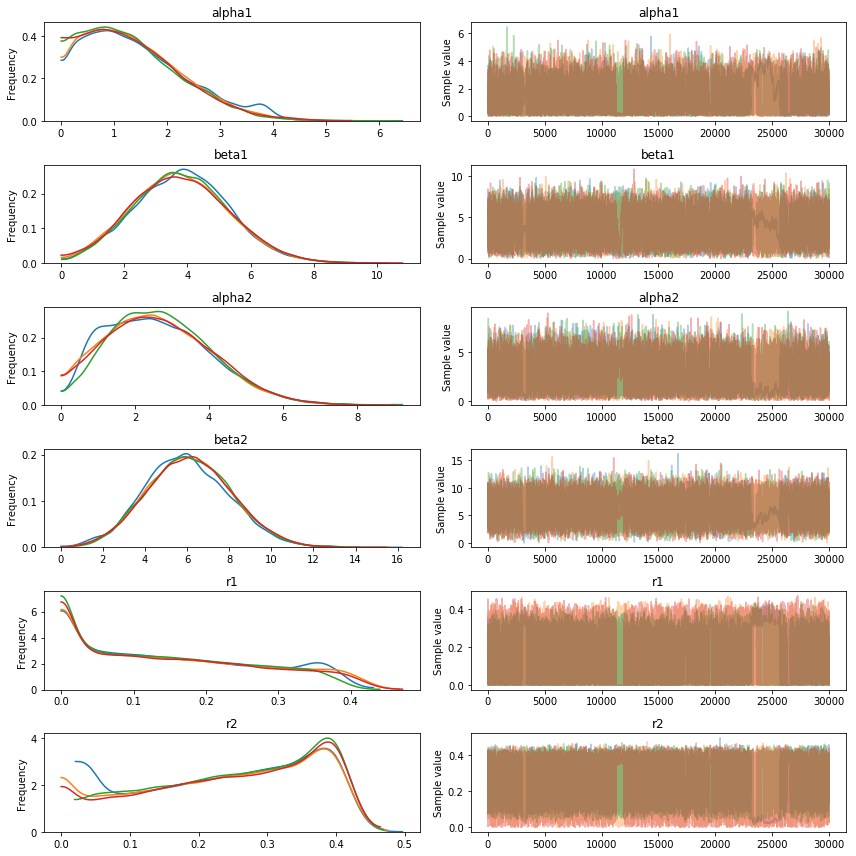

In [4]:
%matplotlib inline

nsamples = 30000
# sampling the model with given data
with model:
    # get sample from model with given observed data
    trace = pymc3.sample(nsamples)
    # illustrate samples
    pymc3.traceplot(trace)